# **Battle of the Neighborhoods - Coursera Final Project**

# **Find the best part of Miami to open a Pizza Shoppe**

# Part 1 - Importing data from Wikipedia and cleaning data for Miami neighborhoods

In [1]:
# import packages 

import pandas as pd
import numpy as np


In [2]:
# scraping the table from wikipedia and creating a dataframe

df_read = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami', match='Neighborhood', flavor='bs4', header=[0])

df = pd.DataFrame(data=df_read[0])

df.head(2)

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190


In [3]:
# rename and drop the columns 

df = df.rename(columns={'Population2010': 'Population'})

df = df.drop(['Demonym', 'Population/Km²', 'Sub-neighborhoods'], axis=1)

df

,Neighborhood,Population,Coordinates
0,Allapattah,54289,25.815-80.224
1,Arts & Entertainment District,11033,25.799-80.190
2,Brickell,31759,25.758-80.193
3,Buena Vista,9058,25.813-80.192
4,Coconut Grove,20076,25.712-80.257
5,Coral Way,35062,25.750-80.283
6,Design District,3573,25.813-80.193
7,Downtown,"71,000 (13,635 CBD only)",25.774-80.193
8,Edgewater,15005,25.802-80.190
9,Flagami,50834,25.762-80.316


In [4]:
# split the coordinates into lat and long

df['Coordinates'] = df['Coordinates'].astype(str)

df[['Latitude','Longitude']] = df.Coordinates.str.split("-",expand=True)

df.drop('Coordinates', axis=1, inplace=True)

df

,Neighborhood,Population,Latitude,Longitude
0,Allapattah,54289,25.815,80.224
1,Arts & Entertainment District,11033,25.799,80.190
2,Brickell,31759,25.758,80.193
3,Buena Vista,9058,25.813,80.192
4,Coconut Grove,20076,25.712,80.257
5,Coral Way,35062,25.750,80.283
6,Design District,3573,25.813,80.193
7,Downtown,"71,000 (13,635 CBD only)",25.774,80.193
8,Edgewater,15005,25.802,80.190
9,Flagami,50834,25.762,80.316


In [5]:
# clean up missing data and misc


df.iloc[7,1]= 71000                                      # clean up str text 

df.iloc[16,1]= 24870                                     # google searched to find these missing populations

df.iloc[21,1]= 228

df.drop([11, 25], inplace=True)

df['Population'] = df['Population'].astype(np.int64)      # cast number types

df['Latitude'] = df['Latitude'].astype(np.float64)

df['Longitude'] = df['Longitude'].astype(np.float64)

df['Longitude'] = df['Longitude'] * -1                    # make longitude negative again

df.reset_index(drop=True , inplace=True)

df

,Neighborhood,Population,Latitude,Longitude
0,Allapattah,54289,25.815,-80.224
1,Arts & Entertainment District,11033,25.799,-80.190
2,Brickell,31759,25.758,-80.193
3,Buena Vista,9058,25.813,-80.192
4,Coconut Grove,20076,25.712,-80.257
5,Coral Way,35062,25.750,-80.283
6,Design District,3573,25.813,-80.193
7,Downtown,71000,25.774,-80.193
8,Edgewater,15005,25.802,-80.190
9,Flagami,50834,25.762,-80.316


# Part 2 - Segmenting the venue data using Foursquare

In [6]:
# import data viz libraries and maps

import matplotlib.cm as cm                                 #for colors etc...
import matplotlib.colors as colors


!conda install -c conda-forge folium=0.5.0 --yes            #conda installer

import folium                                               #for maps

import json
from pandas.io.json import json_normalize

import requests 


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [246]:
# The code was removed by Watson Studio for sharing.

In [247]:
# function to find the venues in any neighborhood


LIMIT = 300


def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [248]:
# apply the function to miami neighborhoods

miami_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Allapattah
Arts & Entertainment District
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Downtown
Edgewater
Flagami
Grapeland Heights
Liberty City
Little Haiti
Little Havana
Lummus Park
Midtown
Overtown
Park West
The Roads
Upper Eastside
Venetian Islands
Virginia Key
West Flagler
Wynwood


In [249]:
# analyze each neighborhood

# one hot encoding
miami_onehot = pd.get_dummies(miami_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
miami_onehot['Neighborhood'] = miami_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [miami_onehot.columns[-1]] + list(miami_onehot.columns[:-1])
miami_onehot = miami_onehot[fixed_columns]

miami_onehot.head()


,Yoga Studio,Accessories Store,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,...,Tennis Court,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
# group rows by neighborhood and mean freq

miami_grouped = miami_onehot.groupby('Neighborhood').mean().reset_index()

miami_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Tennis Court,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,Allapattah,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.000000,0.200000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.00000
1,Arts & Entertainment District,0.047619,0.0,0.000000,0.0,0.00000,0.00000,0.000000,0.047619,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.047619,0.0,0.0,0.00000
2,Brickell,0.000000,0.0,0.033898,0.0,0.00000,0.00000,0.033898,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.016949,0.00000,0.000000,0.0,0.0,0.00000
3,Buena Vista,0.000000,0.0,0.023810,0.0,0.02381,0.02381,0.000000,0.047619,0.047619,...,0.0,0.0,0.0,0.0,0.000000,0.02381,0.000000,0.0,0.0,0.02381
4,Coconut Grove,0.000000,0.0,0.333333,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.00000


In [251]:
# function to sort venues in descending order


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [252]:
# each neighborhoods top ten venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = miami_grouped['Neighborhood']

for ind in np.arange(miami_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(miami_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,Convenience Store,Department Store,Lounge,Art Gallery,Sporting Goods Shop,Women's Store,Eastern European Restaurant,Fish Market,Fast Food Restaurant,Farmers Market
1,Arts & Entertainment District,Ice Cream Shop,Restaurant,Yoga Studio,Spa,Moving Target,Cupcake Shop,Paper / Office Supplies Store,Park,Cuban Restaurant,Pizza Place
2,Brickell,Hotel,Italian Restaurant,Café,Japanese Restaurant,Salon / Barbershop,Sandwich Place,Argentinian Restaurant,Juice Bar,Restaurant,American Restaurant
3,Buena Vista,Café,Jewelry Store,Clothing Store,Coffee Shop,Nightclub,Boutique,Art Gallery,Art Museum,Furniture / Home Store,Italian Restaurant
4,Coconut Grove,American Restaurant,Park,Boat or Ferry,Women's Store,Eastern European Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Event Space


# Part 3 - Clustering the similar neighborhoods using KMeans

In [253]:
# choose the best number of clusters using silhouette score

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



miami_cluster = miami_grouped.drop('Neighborhood', 1)

k = [2, 3, 4, 5, 6, 7, 8]

score=[]

for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(miami_cluster)
    silhouette_avg = silhouette_score(miami_cluster, kmeans.labels_)
    score.append(silhouette_score(miami_cluster, kmeans.labels_))
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.5514
Silhouette Score for 3 Clusters: 0.2937
Silhouette Score for 4 Clusters: 0.3044
Silhouette Score for 5 Clusters: 0.1583
Silhouette Score for 6 Clusters: 0.1619
Silhouette Score for 7 Clusters: 0.1804
Silhouette Score for 8 Clusters: 0.1560


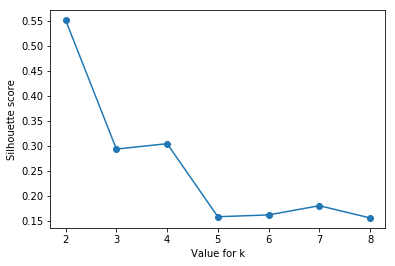

In [254]:
# plot cluster options

plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.show()

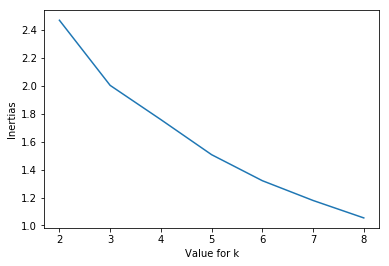

In [255]:
# choose the best number of clusters using elbow method and inertia

inertias = []

for i in k:
    km = KMeans(n_clusters=i, max_iter=1000, random_state=47)
    km.fit(miami_cluster)
    inertias.append(km.inertia_)

plt.plot(k, inertias)
plt.xlabel("Value for k")
plt.ylabel("Inertias")
plt.show()

# 6 seems like a good number of clusters since it has a relatively high silhouette score and a low inertia

In [256]:
#cluster the neighborhoods with optimal cluster number


# set number of clusters
kclusters = 6


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=42).fit(miami_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 0, 0, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

In [257]:
# add clustering labels to dataframe

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

miami_merged = df


# merge miami_grouped with miami_data to add latitude/longitude for each neighborhood
miami_merged = miami_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='right')

miami_merged['Cluster Labels'] = miami_merged['Cluster Labels'].astype(int)


miami_merged.head() # check out the Cluster Labels column!

,Neighborhood,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,54289,25.815,-80.224,5,Convenience Store,Department Store,Lounge,Art Gallery,Sporting Goods Shop,Women's Store,Eastern European Restaurant,Fish Market,Fast Food Restaurant,Farmers Market
1,Arts & Entertainment District,11033,25.799,-80.190,0,Ice Cream Shop,Restaurant,Yoga Studio,Spa,Moving Target,Cupcake Shop,Paper / Office Supplies Store,Park,Cuban Restaurant,Pizza Place
2,Brickell,31759,25.758,-80.193,0,Hotel,Italian Restaurant,Café,Japanese Restaurant,Salon / Barbershop,Sandwich Place,Argentinian Restaurant,Juice Bar,Restaurant,American Restaurant
3,Buena Vista,9058,25.813,-80.192,0,Café,Jewelry Store,Clothing Store,Coffee Shop,Nightclub,Boutique,Art Gallery,Art Museum,Furniture / Home Store,Italian Restaurant
4,Coconut Grove,20076,25.712,-80.257,3,American Restaurant,Park,Boat or Ferry,Women's Store,Eastern European Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Event Space


In [258]:
# create map showing clusters of neighborhoods


latitude = 25.761681
longitude = -80.191788



map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miami_merged['Latitude'], miami_merged['Longitude'], miami_merged['Neighborhood'], miami_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster -1],
        fill=True,
        fill_color=rainbow[cluster -1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluster 1

### This is the choice neighborhood cluster.  Lots of hotels and other restaurants. Even some other popular pizza places (let's avoid these neighborhoods).

In [259]:
miami_merged.loc[miami_merged['Cluster Labels'] == 0, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Arts & Entertainment District,Ice Cream Shop,Restaurant,Yoga Studio,Spa,Moving Target,Cupcake Shop,Paper / Office Supplies Store,Park,Cuban Restaurant,Pizza Place
2,Brickell,Hotel,Italian Restaurant,Café,Japanese Restaurant,Salon / Barbershop,Sandwich Place,Argentinian Restaurant,Juice Bar,Restaurant,American Restaurant
3,Buena Vista,Café,Jewelry Store,Clothing Store,Coffee Shop,Nightclub,Boutique,Art Gallery,Art Museum,Furniture / Home Store,Italian Restaurant
5,Coral Way,Liquor Store,Historic Site,Golf Course,Seafood Restaurant,Mobile Phone Shop,Burger Joint,Café,Pharmacy,Dive Bar,Dog Run
6,Design District,Café,Art Museum,Art Gallery,Clothing Store,Coffee Shop,Nightclub,Boutique,Jewelry Store,Furniture / Home Store,Italian Restaurant
7,Downtown,Italian Restaurant,Hotel,Peruvian Restaurant,Café,Pharmacy,Cocktail Bar,Coffee Shop,Sandwich Place,Lounge,Brazilian Restaurant
8,Edgewater,Restaurant,Sandwich Place,Gym,Peruvian Restaurant,Tapas Restaurant,Pizza Place,Coffee Shop,Cuban Restaurant,Italian Restaurant,Art Gallery
9,Flagami,Seafood Restaurant,Bakery,Pizza Place,Latin American Restaurant,Peruvian Restaurant,Department Store,Fast Food Restaurant,Spanish Restaurant,Pet Store,Gastropub
10,Grapeland Heights,Hotel Bar,Auto Garage,Hotel Pool,Gym / Fitness Center,Gym,Golf Course,Lounge,Restaurant,Bus Station,Bar
12,Little Haiti,Yoga Studio,Record Shop,Hotel,Gas Station,Ice Cream Shop,Italian Restaurant,Fast Food Restaurant,Liquor Store,Donut Shop,Dance Studio


# Cluster 2

### Not too much going on in this neighborhood.  Do people want to eat pizza at the beach?

In [260]:
miami_merged.loc[miami_merged['Cluster Labels'] == 1, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Virginia Key,Beach,Women's Store,Eastern European Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Event Space,Empanada Restaurant,Donut Shop


# Cluster 3

### Not too much going on in this neighborhood. 

In [261]:
miami_merged.loc[miami_merged['Cluster Labels'] == 2, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Liberty City,Southern / Soul Food Restaurant,Bar,Park,Women's Store,Eastern European Restaurant,Fish Market,Fast Food Restaurant,Farmers Market,Event Space,Empanada Restaurant


# Cluster 4

### Not too much going on in these neighborhoods. Do people want to eat pizza in a park or on a ferry? 

In [262]:
miami_merged.loc[miami_merged['Cluster Labels'] == 3, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Coconut Grove,American Restaurant,Park,Boat or Ferry,Women's Store,Eastern European Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Event Space
20,Venetian Islands,Athletics & Sports,Lounge,Park,Boat or Ferry,Women's Store,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Event Space


# Cluster 5

### Not too much going on in this neighborhood. 

In [263]:
miami_merged.loc[miami_merged['Cluster Labels'] == 4, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Overtown,Wings Joint,Southern / Soul Food Restaurant,Farmers Market,Athletics & Sports,Food Truck,Flea Market,Fish Market,Fast Food Restaurant,Event Space,Empanada Restaurant


# Cluster 6

### Not too much going on in this neighborhood.

In [264]:
miami_merged.loc[miami_merged['Cluster Labels'] == 5, miami_merged.columns[[0] + list(range(5, miami_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,Convenience Store,Department Store,Lounge,Art Gallery,Sporting Goods Shop,Women's Store,Eastern European Restaurant,Fish Market,Fast Food Restaurant,Farmers Market


# Part 4 - Find the neighborhoods with the most pizza places and compare to neighborhood populations

In [265]:
# count the total number of pizza places per neighborhood

miami_pizza = miami_onehot[['Neighborhood','Pizza Place']]

miami_pizza = miami_pizza.groupby(['Neighborhood']).count()

miami_pizza = miami_pizza.reset_index()

miami_pizza = miami_pizza.join(df['Population'])

miami_pizza = miami_pizza.sort_values(by=['Pizza Place'])

miami_pizza.head()

,Neighborhood,Pizza Place,Population
21,Virginia Key,2,14
11,Liberty City,3,19725
4,Coconut Grove,3,20076
20,Venetian Islands,4,228
16,Overtown,4,6736


In [266]:
# add cluster labels to pizza shoppe data frame and drop all cluster except cluster 0


miami_pizza = pd.concat([ miami_pizza , miami_merged['Cluster Labels']], axis=1 )

miami_pizza = miami_pizza[miami_pizza['Cluster Labels'] == 0]


miami_pizza

,Neighborhood,Pizza Place,Population,Cluster Labels
1,Arts & Entertainment District,21,11033,0
2,Brickell,59,31759,0
3,Buena Vista,42,9058,0
5,Coral Way,10,35062,0
6,Design District,41,3573,0
7,Downtown,67,71000,0
8,Edgewater,49,15005,0
9,Flagami,11,50834,0
10,Grapeland Heights,11,14004,0
12,Little Haiti,23,29760,0


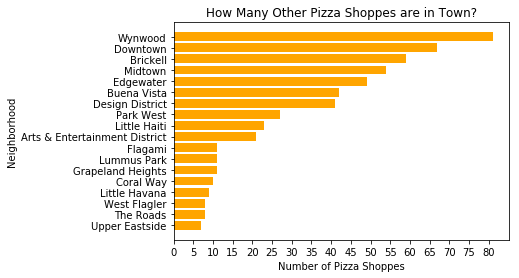

In [267]:
# visualize how many pizza shoppes are in town


miami_pizza = miami_pizza.sort_values(by='Pizza Place')


y = miami_pizza['Neighborhood']
width = miami_pizza['Pizza Place']

plt.xticks(np.arange(0, 85, step=5))
plt.xlabel('Number of Pizza Shoppes')
plt.ylabel('Neighborhood')
plt.title('How Many Other Pizza Shoppes are in Town?')
plt.barh(y, width, height=0.8, left=None, align='center', color = 'orange') 


plt.show()


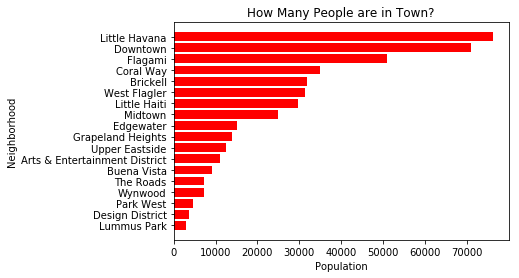

In [268]:
# visualize the populations


miami_pizza = miami_pizza.sort_values(by='Population')


y = miami_pizza['Neighborhood']
width = miami_pizza['Population']

plt.xticks(np.arange(0, 80000, step=10000))
plt.xlabel('Population')
plt.ylabel('Neighborhood')
plt.title('How Many People are in Town?')
plt.barh(y, width, height=0.8, left=None, align='center', color = 'red') 


plt.show()

# Top Two Neighborhoods

In [269]:
# narrow the decision down to neighborhood with a big population and small number of pizza shoppes

miami_pizza = miami_pizza[miami_pizza['Population'] > 15000]
miami_pizza = miami_pizza[miami_pizza['Pizza Place'] < 10]

miami_pizza


,Neighborhood,Pizza Place,Population,Cluster Labels
22,West Flagler,8,31407,0
13,Little Havana,9,76163,0


# Top Neighborhood ! !

In [270]:
# Flagami's second most popular venue is already a pizza place... so drop Flagami

miami_pizza = miami_pizza.drop([22])

miami_pizza

,Neighborhood,Pizza Place,Population,Cluster Labels
13,Little Havana,9,76163,0


# Comparing the two, Little Havana is the best place to open a pizza shoppe based on the fact that there is more than double the population and the same amount of pizza shoppes as West Flagler.

# There is a high Population (76163) and a small number of Pizza Shoppes (9)

# Little Havana it is!